In [2]:
import pyspark
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sbn
import pandas as pd

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sbn.set(style="whitegrid") # seteando tipo de grid en seaborn

# **Apertura de archivos a usar durante la resolucion del trabajo practico.**

In [3]:
postulaciones_educacion = pd.read_csv('/home/lucas/Documentos/Facultad/OrgaDeDatos/tp_2018/fiuba_1_postulantes_educacion.csv')
postulaciones_genero_edad = pd.read_csv('/home/lucas/Documentos/Facultad/OrgaDeDatos/tp_2018/fiuba_2_postulantes_genero_y_edad.csv')
vistas = pd.read_csv('/home/lucas/Documentos/Facultad/OrgaDeDatos/tp_2018/fiuba_3_vistas.csv')
postulaciones = pd.read_csv('/home/lucas/Documentos/Facultad/OrgaDeDatos/tp_2018/fiuba_4_postulaciones.csv')
avisos_online = pd.read_csv('/home/lucas/Documentos/Facultad/OrgaDeDatos/tp_2018/fiuba_5_avisos_online.csv')
avisos_detalle = pd.read_csv('/home/lucas/Documentos/Facultad/OrgaDeDatos/tp_2018/fiuba_6_avisos_detalle.csv')

# Chequeo elementos nulos es los archivos

In [4]:
postulaciones_educacion.isnull().any()

idpostulante    False
nombre          False
estado          False
dtype: bool

In [5]:
postulaciones_genero_edad.isnull().any()

idpostulante       False
fechanacimiento     True
sexo               False
dtype: bool

In [6]:
vistas.isnull().any()

idAviso         False
timestamp       False
idpostulante    False
dtype: bool

In [7]:
avisos_online.isnull().any()

idaviso    False
dtype: bool

In [8]:
avisos_detalle.isnull().any()

idaviso                 False
idpais                  False
titulo                  False
descripcion             False
nombre_zona             False
ciudad                   True
mapacalle                True
tipo_de_trabajo         False
nivel_laboral           False
nombre_area             False
denominacion_empresa     True
dtype: bool

In [9]:
postulaciones.isnull().any()

idaviso             False
idpostulante        False
fechapostulacion    False
dtype: bool

In [10]:
#Creo una columna para poder utilizar la fecha mas comodamente
#Datos solo de enero y febrero
postulaciones['date'] = pd.to_datetime(postulaciones['fechapostulacion']).dt.date

postulaciones.head()

,idaviso,idpostulante,fechapostulacion,date
0,1112257047,NM5M,2018-01-15 16:22:34,2018-01-15
1,1111920714,NM5M,2018-02-06 09:04:50,2018-02-06
2,1112346945,NM5M,2018-02-22 09:04:47,2018-02-22
3,1112345547,NM5M,2018-02-22 09:04:59,2018-02-22
4,1112237522,5awk,2018-01-25 18:55:03,2018-01-25


# Algunos graficos de cada archivo por separado

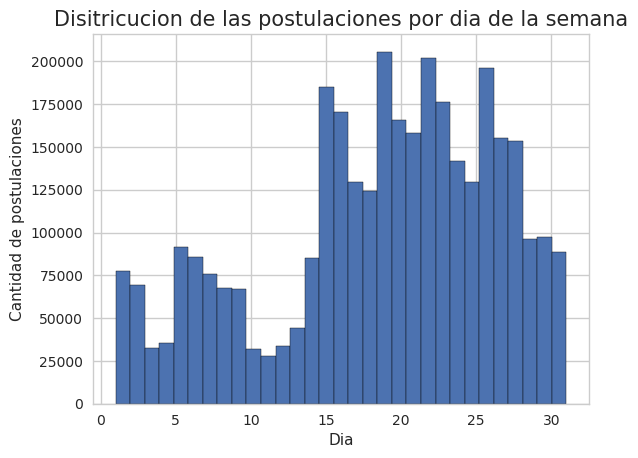

In [11]:
#Dsitricucion de las postulaciones por dia de la semana
g_day = pd.to_datetime(postulaciones['date']).dt.day.hist(bins=31,edgecolor='black');
g_day.set_title('Disitricucion de las postulaciones por dia de la semana',fontsize=15)
g_day.set_xlabel('Dia')
g_day.set_ylabel('Cantidad de postulaciones');

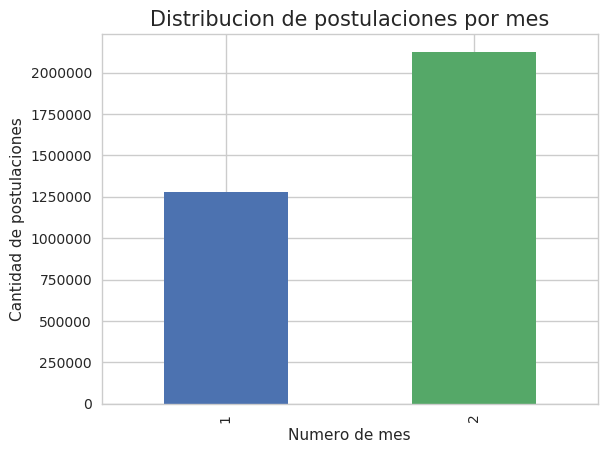

In [12]:
#Districucion de las postulaciones por mes. Obiamente solo hay datos de la mitad de Enero.
g_month = pd.to_datetime(postulaciones['date']).dt.month.value_counts().sort_index().plot(kind='bar')
g_month.set_title('Distribucion de postulaciones por mes',fontsize=15)
g_month.set_xlabel('Numero de mes')
g_month.set_ylabel('Cantidad de postulaciones');

Ambos graficos son engañosos. El primero muestra que hay mas postulaciones en la segunda mitad de los meses pero eso es porque los datos de Enero son solo de la segunda mitad del mes. De igual manera el sugundo grafico muestra que Enero tiene practicamente la mitad de postulaciones que Febrero. Tambien se debe a lo comentado anteriormente, solo hay datos de la segunda mitad de Enero.

In [13]:
#DIAS ESPECIFICOS DE ENERO DE LOS CUALES SE TIENEN DATOS
enero = postulaciones['date'][pd.to_datetime(postulaciones['date']).dt.month == 1]
enero = pd.DataFrame(enero.unique()).sort_values(by=0, ascending=False)
enero[0].count()
#enero

17

In [14]:
#DIAS ESPECIFICOS DE FEBRERO DE LOS CUALES SE TIENEN DATOS
febrero = postulaciones['date'][pd.to_datetime(postulaciones['date']).dt.month == 2]
febrero = pd.DataFrame(febrero.unique()).sort_values(by=0, ascending=False)
febrero[0].count()
#febrero

28

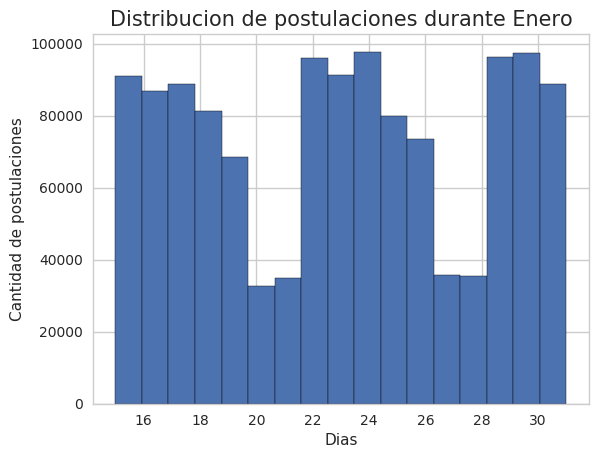

In [15]:
g_month_enero = pd.to_datetime(postulaciones['date'][pd.to_datetime(postulaciones['date']).dt.month == 1]).dt.day.hist(bins=17,edgecolor='black');
g_month_enero.set_title('Distribucion de postulaciones durante Enero',fontsize=15)
g_month_enero.set_xlabel('Dias')
g_month_enero.set_ylabel('Cantidad de postulaciones');

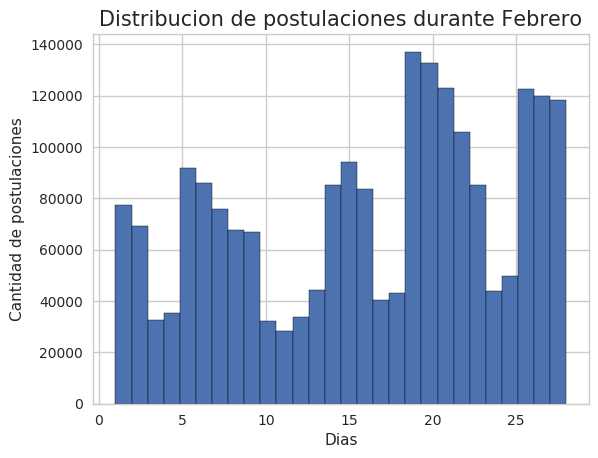

In [54]:
g_month_febrero = pd.to_datetime(postulaciones['date'][pd.to_datetime(postulaciones['date']).dt.month == 2]).dt.day.hist(bins=28,edgecolor='black');
g_month_febrero.set_title('Distribucion de postulaciones durante Febrero',fontsize=15)
g_month_febrero.set_xlabel('Dias')
g_month_febrero.set_ylabel('Cantidad de postulaciones');

**ANALIZAR ESOS BAJONES EN LOS GRAFICOS DE ENERO Y FEBRERO, POR QUE SE DAN? QUE PASA? QUE DIAS CAEN? SON FINES DE SEMANA?**

In [17]:
postulaciones_educacion.head()

,idpostulante,nombre,estado
0,NdJl,Posgrado,En Curso
1,8BkL,Universitario,En Curso
2,1d2B,Universitario,En Curso
3,NPBx,Universitario,En Curso
4,NPBx,Master,En Curso


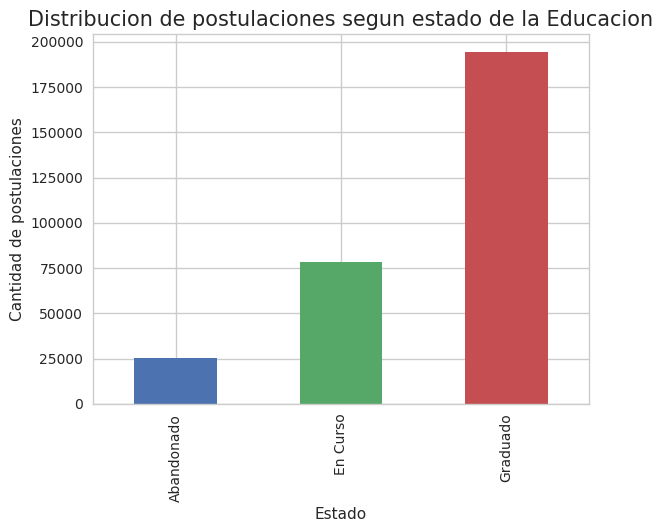

In [19]:
post_educ_estado = postulaciones_educacion['estado'].value_counts().sort_index().plot(kind='bar')
post_educ_estado.set_title('Distribucion de postulaciones segun estado de la Educacion',fontsize=15)
post_educ_estado.set_xlabel('Estado')
post_educ_estado.set_ylabel('Cantidad de postulaciones');

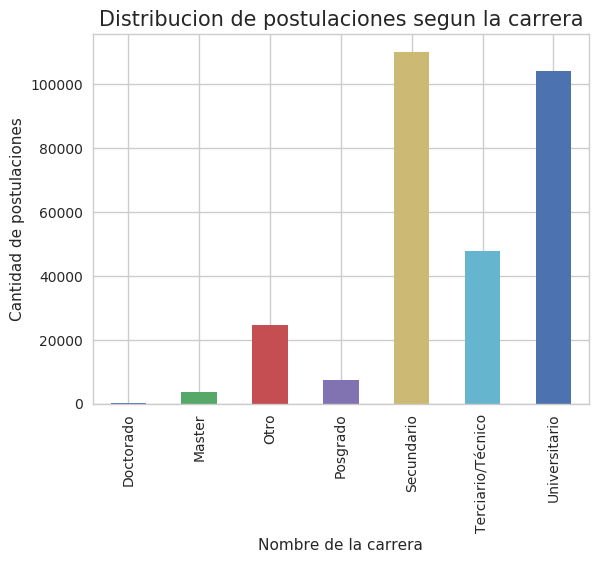

In [20]:
post_educ_carrera = postulaciones_educacion['nombre'].value_counts().sort_index().plot(kind='bar')
post_educ_carrera.set_title('Distribucion de postulaciones segun la carrera',fontsize=15)
post_educ_carrera.set_xlabel('Nombre de la carrera')
post_educ_carrera.set_ylabel('Cantidad de postulaciones');

In [21]:
#ACA ESTARIA BUENO HACER UN GRAFICO QUE INDIQUE POR CADA CARRERA EL ESTADO DE CADA UNA. QUE SE VEA TODO EN EL MISMO 
#GRAFICO.

In [22]:
postulaciones_genero_edad.head()

,idpostulante,fechanacimiento,sexo
0,NM5M,1970-12-03,FEM
1,5awk,1962-12-04,FEM
2,ZaO5,1978-08-10,FEM
3,NdJl,1969-05-09,MASC
4,eo2p,1981-02-16,MASC


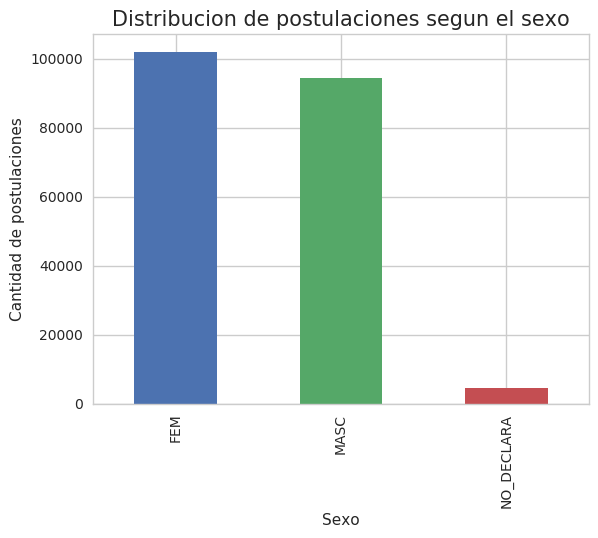

In [23]:
post_genero = postulaciones_genero_edad['sexo'].value_counts().sort_index().plot(kind='bar')
post_genero.set_title('Distribucion de postulaciones segun el sexo',fontsize=15)
post_genero.set_xlabel('Sexo')
post_genero.set_ylabel('Cantidad de postulaciones');

In [24]:
#IGUAL QUE ANTES ESTARIA BUENO HACER EN UN MISMO GRAFICO QUE SE VEA POR GENERO Y EDAD.

In [27]:
avisos_detalle.head()

,idaviso,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
0,8725750,1,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,VENTOR
1,17903700,1,Enfermeras,<p>Solicitamos para importante cadena de farma...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Salud,Farmacias Central Oeste
2,1000150677,1,Chofer de taxi,<p>TE GUSTA MANEJAR? QUERES GANAR PLATA HACIEN...,Capital Federal,NaN,Empedrado 2336,Full-time,Senior / Semi-Senior,Transporte,FAMITAX SRL
3,1000610287,1,CHOFER DE CAMIONETA BAHIA BLANCA - PUNTA ALTA,<p><strong>Somos una empresa multinacional que...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Transporte,Wurth Argentina S.A
4,1000872556,1,Operarios de Planta - Rubro Electrodomésticos,<p><strong>OPERARIOS DE PLANTA</strong></p><p>...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Producción,ELECTRO OUTLET SRL


Senior / Semi-Senior                    9407
Junior                                  2216
Otro                                     921
Jefe / Supervisor / Responsable          809
Gerencia / Alta Gerencia / Dirección     181
Name: nivel_laboral, dtype: int64

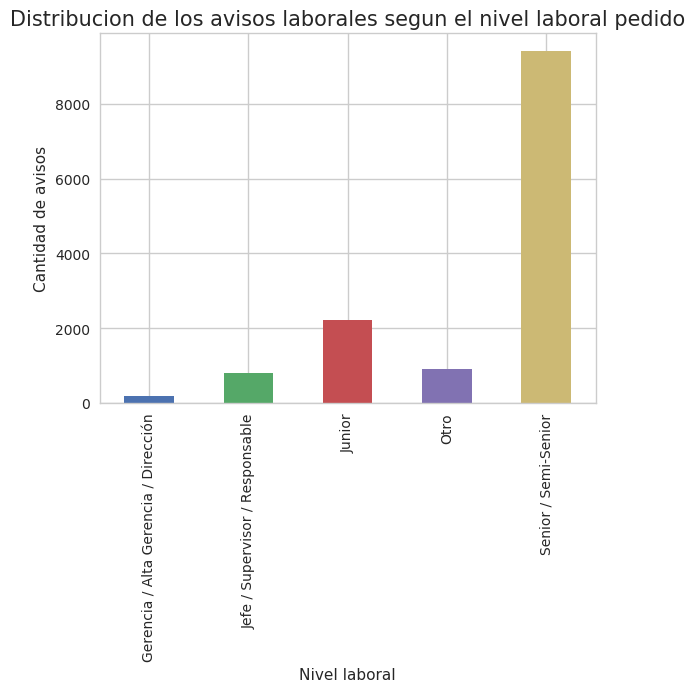

In [56]:
avisos_nivel_laboral = avisos_detalle['nivel_laboral'].value_counts().sort_index().plot(kind='bar')
avisos_nivel_laboral.set_title('Distribucion de los avisos laborales segun el nivel laboral pedido',fontsize=15)
avisos_nivel_laboral.set_xlabel('Nivel laboral')
avisos_nivel_laboral.set_ylabel('Cantidad de avisos');

avisos_detalle['nivel_laboral'].value_counts()

Full-time          12339
Part-time            863
Teletrabajo          110
Por Horas             63
Pasantia              63
Temporario            42
Por Contrato          37
Fines de Semana       14
Primer empleo          3
Name: tipo_de_trabajo, dtype: int64

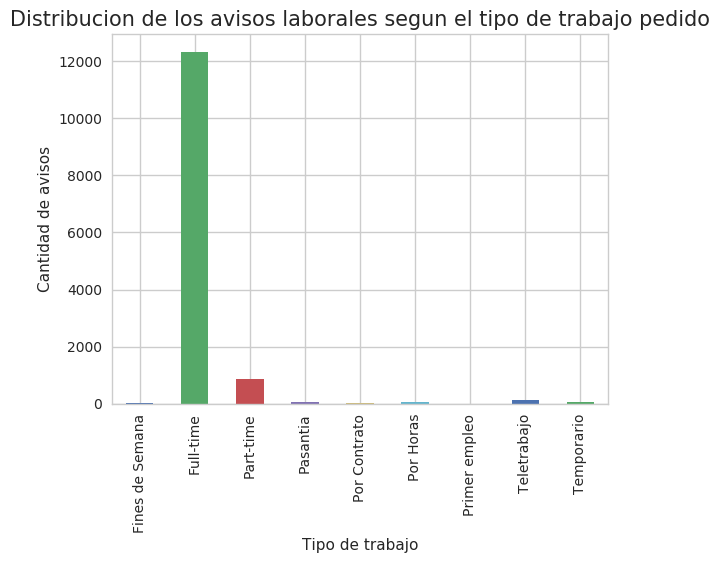

In [57]:
avisos_tipo_de_trabajo = avisos_detalle['tipo_de_trabajo'].value_counts().sort_index().plot(kind='bar')
avisos_tipo_de_trabajo.set_title('Distribucion de los avisos laborales segun el tipo de trabajo pedido',fontsize=15)
avisos_tipo_de_trabajo.set_xlabel('Tipo de trabajo')
avisos_tipo_de_trabajo.set_ylabel('Cantidad de avisos');

avisos_detalle['tipo_de_trabajo'].value_counts()

Gran Buenos Aires              12654
Capital Federal                  876
GBA Oeste                          2
Buenos Aires (fuera de GBA)        2
Name: nombre_zona, dtype: int64

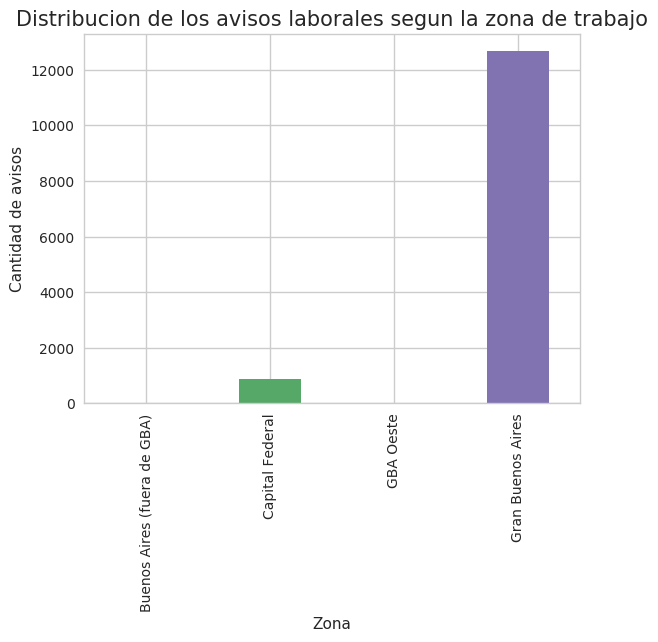

In [58]:
avisos_zona = avisos_detalle['nombre_zona'].value_counts().sort_index().plot(kind='bar')
avisos_zona.set_title('Distribucion de los avisos laborales segun la zona de trabajo',fontsize=15)
avisos_zona.set_xlabel('Zona')
avisos_zona.set_ylabel('Cantidad de avisos');

avisos_detalle['nombre_zona'].value_counts()

# Comenzar con el merge de los datos
**(Ver que hacer con los nulos)**

In [53]:
vistas.head()

,idAviso,timestamp,idpostulante
0,1111780242,2018-02-23T13:38:13.187-0500,YjVJQ6Z
1,1112263876,2018-02-23T13:38:14.296-0500,BmVpYoR
2,1112327963,2018-02-23T13:38:14.329-0500,wVkBzZd
3,1112318643,2018-02-23T13:38:17.921-0500,OqmP9pv
4,1111903673,2018-02-23T13:38:18.973-0500,DrpbXDP


In [62]:
avisos_online.head()

,idaviso
0,1112355872
1,1112335374
2,1112374842
3,1111984070
4,1111822480


In [68]:
#RENOMBRO LA COLUMNA idAviso DEL DF VISTAS PARA QUE COINCIDA CON EL DE AVISOS_ONLINE
vistas = vistas.rename(columns={'idAviso':'idaviso'})

In [70]:
#HAGO UN MERGE PARA VER SOLO LOS AVISOS ONLINE QUE HALLAN SIDO VISTOS
pd.merge(vistas, avisos_online, on='idaviso', how='inner')

,idaviso,timestamp,idpostulante
0,1111780242,2018-02-23T13:38:13.187-0500,YjVJQ6Z
1,1112263876,2018-02-23T13:38:14.296-0500,BmVpYoR
2,1112327963,2018-02-23T13:38:14.329-0500,wVkBzZd
3,1112318643,2018-02-23T13:38:17.921-0500,OqmP9pv
4,1111903673,2018-02-23T13:38:18.973-0500,DrpbXDP
